# Walkthrough 1: Introduction to Oqtant and Oqtant Quantum Matter Services (QMS) #
This notebook runs on Oqtant hardware and uses **1 job** 

## Introduction ##

Welcome to the `Oqtant python API`, aka `OqtAPI`, an object-oriented interface for creating, submitting, and retrieving results from experiments with ultracold quantum matter on Infleqtion's Oqtant Quantum Matter Services (QMS) platform.  In this introductory walkthrough, we will explore the basics of how you interact with Oqtant QMS using OqtAPI.  The general workflow is as follows:

1. Create an Oqtant account: [https://oqtant.infleqtion.com](https://oqtant.infleqtion.com)
2. Download and install Oqtant: [https://pypi.org/project/oqtant/](https://pypi.org/project/oqtant/)
3. Run this Jupyter Notebook to get started!
4. Instantiate an instance of the `QuantumMatterFactory`, which facilitates communication with Oqtant QMS. This object handles authentication.
5. Create a user-defined `QuantumMatter`, aka *matter*, object for making and/or manipulating quantum matter.  This is accomplished with the help of a `QuantumMatterFactory`.  This *factory* will serve as your "one stop shop" for creation of abstracted objects that control experiments carried out on the Oqtant hardware.
6. Submit your *matter* object to Oqtant QMS.  This submits your job to Oqtant's hardware platform. Each *matter* object represents one job, and is identified by a `job id` (UUID or *id*). 
7. Use the *matter* object to check status of your job.
8. When your job is complete, view and analyze results.  

For more information, please refer to our documentation: [https://oqtant-docs.infleqtion.com](https://oqtant-docs.infleqtion.com)

See our web application https://oqtant.infleqtion.com/ for quick access to job creation, results, and account management.


Support, feature requests, and bug reports can be submitted here: [https://oqtant.infleqtion.com/support](https://oqtant.infleqtion.com/support)

This, along with all our example notebooks are publicly available for download from our [GitLab repository.](https://gitlab.com/infleqtion/albert/oqtant-documentation/-/tree/main/oqtant_documentation/docs/examples?ref_type=heads)


This walkthrough focuses on how to use OqtAPI with Oqtant QMS.  Follow-on walkthroughs will explore user options, accessible abstractions, and data structures in more detail.

### Imports and authentication (requires account authentication) ###

In [ ]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

qmf = QuantumMatterFactory()
qmf.get_login()

In [ ]:
qmf.get_client()

## Your first *QuantumMatter* object and job ##

The QuantumMatter object captures the user-defined inputs that control the behavior of Oqtant hardware.  We will explore the available options and underlying data structures in detail in following walkthroughs.

### Instantiate a *QuantumMatter* object ###

Create a QuantumMatter object to generate quantum matter at a target temperature (in nanokelvin, nK).  We will also give our object a name (optional).  Use the imported `QuantumMatterFactory.create_quantum_matter()` method:

In [3]:
matter = qmf.create_quantum_matter(temperature=100, name="my second quantum matter")
print(matter)

name='my second quantum matter' temperature=100.0 lifetime=10 image=<ImageType.TIME_OF_FLIGHT: 'TIME_OF_FLIGHT'> time_of_flight=12 rf_evap=None rf_shield=None barriers=None landscape=None lasers=None note=None client=<oqtant.oqtant_client.OqtantClient object at 0x000001B713840F40> result=None job_id=None output=None is_sim=False sim=None run=1


### Submit your *QuantumMatter* object to Oqtant QMS to run a job ###

Submit our *QuantumMatter* object to Oqtant QMS using the `submit()` method.  This will create a job that will enter the QMS job queue.  When you submit, the *QuantumMatter* object recieves a unique job *id* (32 character UUID string). Track the status of our job in the queue by passing the *track=True* option.  The default value is *False*.  

In [4]:
matter.submit(track=True)

Submitting 1 job(s):

- Job: my second quantum matter
  Job ID: eb7d0bbe-011f-4c14-888c-44508d3fa6b5

Tracking 1 job(s):

- Job: my second quantum matter
  - RUNNING
  - COMPLETE

All job(s) complete


Job are submitted to the queue and receive an id (PENDING), executed on the hardware (RUNNING) and then finish (COMPLETE).  The elapsed time depends on the current queue and whether your account is deducting from priority (paid) or free quotas.  

### Retrieve/fetch the COMPLETE job ###

Once a job is complete, fetch the results with the `get_result()` method.  If your job is not yet complete, you can still fetch the job from the server but the output fields will not be populated.

In [5]:
# get result from server, including results if available
matter.get_result()
matter.status

'COMPLETE'

### Extract, visualize, and analyze job results ###

#### Output data fields  ####

The contents of the output data depend on the initially constructed QuantumMatter object.  Review the contents of a completed job:

In [6]:
matter.output.fields

- mot_fluorescence_image
  - pixels
  - rows
  - columns
  - pixcal
- tof_image
  - pixels
  - rows
  - columns
  - pixcal
- tof_fit_image
  - pixels
  - rows
  - columns
  - pixcal
- tof_fit
  - gaussian_od
  - gaussian_sigma_x
  - gaussian_sigma_y
  - tf_od
  - tf_x
  - tf_y
  - x_0
  - y_0
  - offset
- tof_x_slice
  - points
- tof_y_slice
  - points
- total_mot_atom_number
- tof_atom_number
- thermal_atom_number
- condensed_atom_number
- temperature_nk


This job contains results from a fluorescence image of the magneto-optical trap (MOT): a cooling stage early in the sequence that produces the quantum matter that is useful for diagnosing number drifts etc., 

This job also contains a time-of-flight (TOF) absorption image with pixel data, row/column counts, and a pixel calibration (pixcal, in microns/pixel), a fit version of the TOF image based on the calculated thermal/condensed atom populations and the associated calculated temperature.  These fit results are derived from fitting a "bimodal" distribution, consisting of a sum of Gaussian (thermal/classical phase) and Thomas-Fermi (condensed phase) distributions, to the resulting (time of flight) image of the atoms.  Data corresponding to the bimodal fit are included in the tof_fit field.  

All TOF image results are given in terms of the optical depth (OD).  Advanced users may wish to implement their own temperature and atom population calculations using the included raw image data.  

Any of the output data contents can be accessed programmatically:

In [7]:
print("temperature (nK):", matter.output.temperature_nk)
print("thermal atom population:", matter.output.thermal_atom_number)
print("condensed atom population:", matter.output.condensed_atom_number)

temperature (nK): 162
thermal atom population: 37750
condensed atom population: 5917


#### Extract output image data ####

OD image data can be accessed programatically as above, or using the `QuantumMatter.output.get_image_data()` helper method for additional processing.  Specify the type of image data to be fetched . For this example, the image options are "MOT", "TIME_OF_FLIGHT", and "TIME_OF_FLIGHT_FIT".   

In [8]:
tof_image_data = matter.output.get_image_data(image="TIME_OF_FLIGHT")
tof_fit_image_data = matter.output.get_image_data(image="TIME_OF_FLIGHT_FIT")

Image data is returned as a 2D numpy array of values for integer-valued pixel positions.  Convert pixel positions to position space using the pixel calibration value via the `QuantumMatter.output.get_image_pixcal` helper function, which returns the units of microns/pixel for each image type.

In [9]:
matter.output.get_image_pixcal("TIME_OF_FLIGHT")

4.4

Access pre-calculated cuts of the time-of-flight image along the detected center/peak of the atom ensemble:

In [11]:
x_slice = matter.output.get_slice(axis="x")
print("x-slice: ", x_slice[0:5])
y_slice = matter.output.get_slice(axis="y")
print("y-slice: ", y_slice[0:5])

x-slice:  [-0.03847772935525559, -0.05357118251753738, -0.023739138223523665, -0.0062017975424166595, 0.027222791333841184]
y-slice:  [0.058041758365273366, 0.005338624191457333, -0.0250479825129293, 0.0324867731992234, 0.029763281240659713]


#### Visualize results ####

OqtAPI provides a number of tools/methods for visualizing job outputs.  

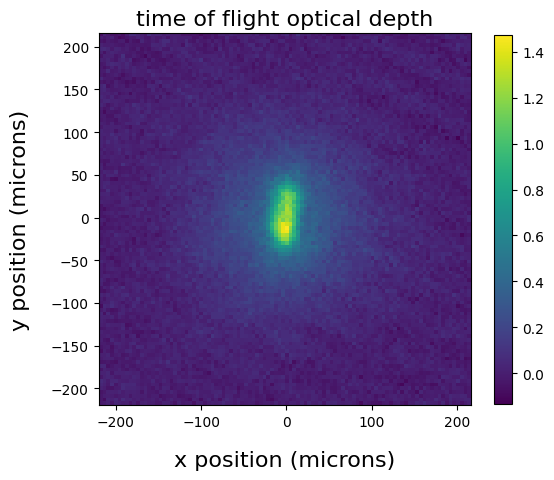

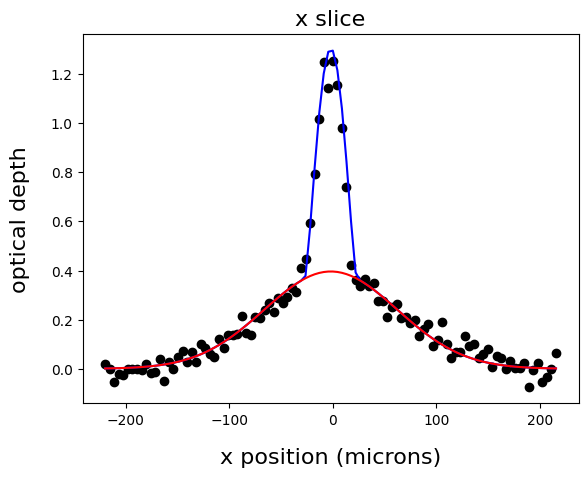

In [12]:
matter.output.plot_tof(figsize=(6, 6))
matter.output.plot_slice(axis="x")

Built-in plots show the image of the atoms taken at the end of the experiment, in units of optical depth, as well as cuts along the x and y axes.  The latter two plots include solid curves corresponding to the bimodal fit that includes the contributions from the quantum matter's thermal fraction (red curve) and thermal + condensed combination (blue curve).

The OD data can be used directly for further customization and analysis:

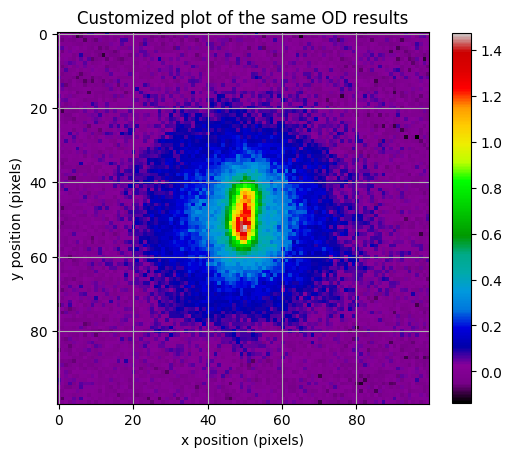

In [13]:
import matplotlib.pyplot as plt

TOF_data = matter.output.get_image_data("TIME_OF_FLIGHT")
plt.figure(figsize=(6, 6))
plt.title("Customized plot of the same OD results")
TOF_plot = plt.imshow(TOF_data, origin="upper", cmap="nipy_spectral")
plt.grid(visible=True)
plt.xlabel("x position (pixels)")
plt.ylabel("y position (pixels)")
plt.colorbar(TOF_plot, shrink=0.8)
plt.show()

## Job management using the local filesystem ##

Choose to retrieve jobs from the Oqtant web app, provided they have not been deleted or removed, or save the job data on your local machine. Local operation is convenient when dealing with large sets of jobs, or without network connectivity.

### Save a job to file ###

Record *QuantumMatter* from the current by saving information to a local file.  For this, you can use the `QuantumMatter.write_to_file()` method:

In [14]:
matter.write_to_file()

Wrote file: "eb7d0bbe-011f-4c14-888c-44508d3fa6b5.txt"


By default, this method will save the job data in a newly created local file with the name `*job id*.txt` in the same directory as the current walkthrough / jupyter notebook.  Alternatively, you can customize the resulting filename:

In [15]:
matter.write_to_file(file_name=matter.name)  # use job name as filename instead

Wrote file: "my second quantum matter.txt"


Full control of data saving is made available by providing the *full* path of the desired output file: (example with default Linux path)

In [17]:
import os

home = os.path.expanduser("~")

matter.write_to_file(file_path=f"{home}\Documents\\{matter.job_id}.txt")

Wrote file: "C:\Users\username\path_to_file\eb7d0bbe-011f-4c14-888c-44508d3fa6b5.txt"


We recommend using the default of the job id to reduce possibility of overwriting job data.

### Load a job from file ###

Retrieve a job from a local file with (local directory) filename or the full file path:

In [18]:
job_from_file = qmf.load_matter_from_file(f"{matter.job_id}.txt")

Wrote file: "eb7d0bbe-011f-4c14-888c-44508d3fa6b5.txt"


## Additional details, features, and discussion ##

### Include user notes ###

Every *QuantumMatter* object can hold a note up to 500 characters long. This can be used to add context and additional information. A note remains tied to the job and can be referenced later.  The note can be added at the point of creating the QuantumMatter object:

In [19]:
matter_with_note = qmf.create_quantum_matter(
    temperature=100,
    name="matter with a note",
    note="This is something special that I would like to remember.",
)

### What is a `JobType`? ###

Each QuantumMatter object submitted to Oqtant is assigned a `JobType` that depends on what features and options are specified.  This allows Oqtant to enable or disable certain hardware features depending on what the user requires.  We will explore the different job types in future walkthroughs.  If you are using the web app, jobs will be identified by the associated job type.  For our example shown here, our *matter* object is a *BEC* job:  

In [20]:
matter.job_type

<JobType.BEC: 'BEC'>

### Search for previous jobs ###

Need to go back in time? See a history of jobs submitted in previous sessions using `QuantumMatterFactory.search_jobs()`. This method provides a way to ask Oqtant for jobs associated to your account that match certain search criteria.

The supported search values are:

- job_type
- name
- submit_start
- submit_end
- notes

*Note: submit_start and submit_end must be in ISO format to properly work (YYYY-MM-DD or YYYY-MM-DDThh:mm:ss)*

Using these search values Oqtant will return to you any jobs that are associated to your account and match the provided criteria.

In [21]:
found_jobs = qmf.search_jobs(name="my first", limit=3, show_results=True)

### Load job by Id ###

You can also load jobs by External Id. You can find this External ID through the search_ jobs method or from the "My Jobs" page of the Oqtant Web Application. We can see below that after loading Quantum Matter object from the last run job i has access to the same output fields as before. 

In [17]:
# this assumes that you created a job with name first job. You can alternatively replace job id with
# a job id from your job list
my_job = qmf.search_jobs(limit=1, show_results=False)
first_job = qmf.load_matter_from_job_id(job_id=my_job[0]["external_id"], run=1)
print("Time-of-flight total atom number: ", first_job.output.tof_atom_number)

Time-of-flight total atom number:  45505


### Show the current status of your jobs in the queue ###

When executing many jobs on Oqtant QMS, it is useful to be able to check the status of your submitted jobs without fetching each job individually and checking the status field.  This can be accomplished using the `QuantumMatterFactory.show_queue_status()` method, which accepts the same filters as `QuantumMatterFactory.search_jobs()`.

In [23]:
from datetime import datetime, timedelta

# set a date range to find jobs submitted within, in this case jobs submitted today
today = datetime.today()
submit_start = today.strftime("%Y%m%d")
submit_end = (today + timedelta(days=1)).strftime("%Y%m%d")

# search for jobs that have yet to complete
qmf.show_queue_status(submit_start=submit_start, submit_end=submit_end)

0 job(s) queued:

╒════════╤══════════╤══════════╤══════╕
│ Name   │ Status   │ Submit   │ ID   │
╞════════╪══════════╪══════════╪══════╡
╘════════╧══════════╧══════════╧══════╛


If you would like to also see completed jobs, you can pass the include_complete=True option:

In [24]:
# search for jobs submitted today, including those that have already completed
qmf.show_queue_status(
    submit_start=submit_start,
    submit_end=submit_end,
    include_complete=True,
    limit=20,  # limit the number of results shown (100 max)
)

1 job(s) queued:

╒══════════════════════════╤══════════╤═══════════════════════╤══════════════════════════════════════╕
│ Name                     │ Status   │ Submit                │ ID                                   │
╞══════════════════════════╪══════════╪═══════════════════════╪══════════════════════════════════════╡
│ my second quantum matter │ COMPLETE │ 08 May 2024, 14:29:53 │ eb7d0bbe-011f-4c14-888c-44508d3fa6b5 │
╘══════════════════════════╧══════════╧═══════════════════════╧══════════════════════════════════════╛


### Query your current job quota ###

In [25]:
qmf.show_job_limits()

### Units ###

Oqtant uses units that are natural choices for dealing with the quantum matter produced and manipulated by the Oqtant platform.  The table below is a summary of relevant units used throughout this and following walkthroughs.  Some of these objects/quantities have not yet been encountered, but will be shortly.  

| Quantity            | Units                         | Notes                               |
|---------------------|-------------------------------|-------------------------------------|
| time                | milliseconds (ms, $10^{-3}$ m)|                                     |
| frequency           | megahertz (MHz, $10^6$ Hz)    | RF knife frequency, relative to the energetic trap bottom, $\geq 0$ |
| powers              | milliwatts (mW, $10^{-3}$ W)  | RF knife loop antenna delivered power, $\geq 0$ | 
| temperature         | nanokelvin (nK, $10^{-9}$ K)  | Target or derived atom temperature  |
| barrier height      | kilohertz (kHz, $10^{3}$ Hz)  | Energetic height (J) / Planck's constant|
| barrier position    | microns ($\mu m$, $10^{-6}$ m)| Barrier center position             |
| barrier width       | microns ($\mu m$, $10^{-6}$ m)| Shape-dependent barrier width       |
| landscape potential | kilohertz (kHz, $10^{3}$ Hz)  | Energetic height (J) / Planck's constant|